In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


In [2]:
df = pd.read_csv("C:/Users/Rahul K/OneDrive/Desktop/data science/car.csv")

In [3]:
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [4]:
df.tail()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
200,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845
201,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045
202,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485
203,-1,95,volvo,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470
204,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,19,25,22625


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  205 non-null    object 
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       205 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16  engine-size        205 non

In [9]:
for i in range(len(df['price'])):
    if df['price'][i] == '?':
        df['price'][i] = 16000

In [10]:
df['price'] = pd.to_numeric(df['price'])

In [11]:
df[['make', 'price']].groupby(['make'], as_index = False).mean().sort_values(by = 'price', ascending = False)

,make,price
7,jaguar,34600.000000
9,mercedes-benz,33647.000000
2,bmw,26118.750000
15,porsche,25120.400000
21,volvo,18063.181818
10,mercury,16503.000000
0,alfa-romero,15498.333333
13,peugot,15489.090909
1,audi,15307.857143
17,saab,15223.333333


In [12]:
df.make.unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'mercedes-benz', 'mercury',
       'mitsubishi', 'nissan', 'peugot', 'plymouth', 'porsche', 'renault',
       'saab', 'subaru', 'toyota', 'volkswagen', 'volvo'], dtype=object)

In [13]:
df.loc[df.duplicated()]

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price


In [14]:
fuel = df['fuel-type'].apply(lambda x : x.split(' ')[0])

df.insert(4, 'fuel', fuel)
df.drop(['fuel-type'], axis = 1, inplace = True)


In [15]:
df.head()

,symboling,normalized-losses,make,fuel,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


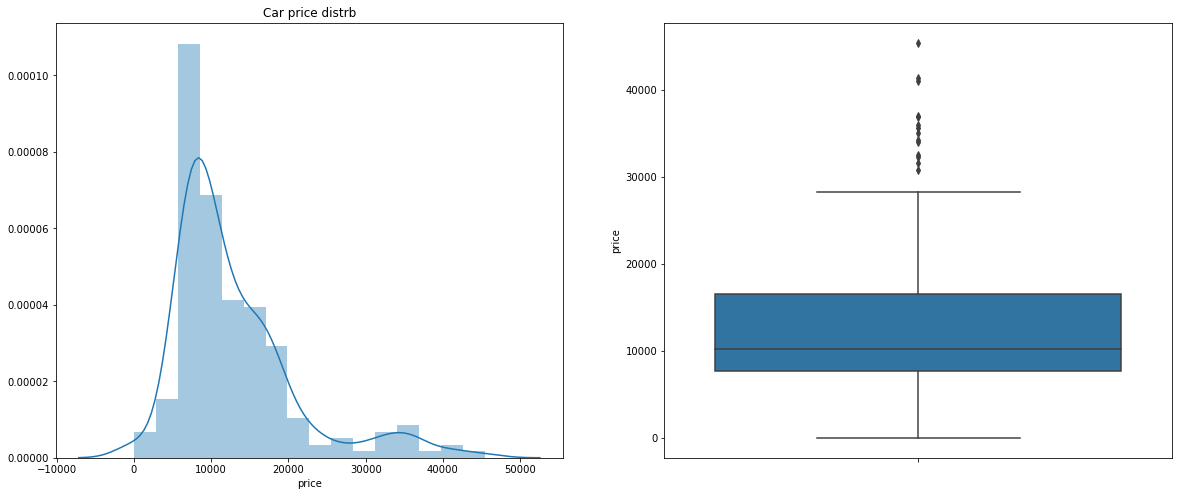

In [16]:
plt.figure(figsize = (20,8))

plt.subplot(1,2,1)
plt.title('Car price distrb')
sns.distplot(df.price)

plt.subplot(1,2,2)
plt.title = ('prize spread')
sns.boxplot(y=df.price)

plt.show()

[Text(0, 0.5, 'freq'), Text(0.5, 0, 'Fuel type')]

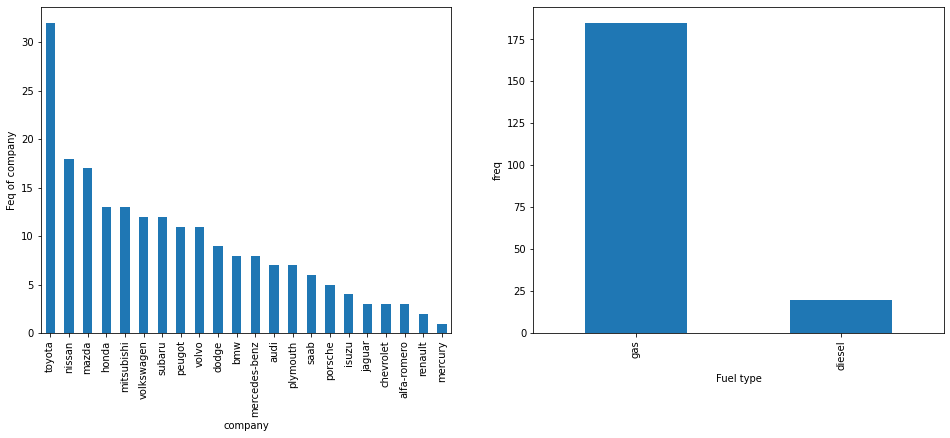

In [17]:
plt.figure(figsize = (25, 6))

plt.subplot(1,3,1)
plt1 = df.make.value_counts().plot(kind='bar')


plt1.set(xlabel = 'company', ylabel = 'Feq of company')

plt.subplot(1,3,2)
plt1 = df.fuel.value_counts().plot(kind='bar')


plt1.set(xlabel = 'Fuel type', ylabel= 'freq')


In [18]:
enginetype = df['engine-type'].apply(lambda x : x.split(' ')[0])

df.insert(15, 'enginetype', enginetype)
df.drop(['engine-type'], axis = 1, inplace = True)

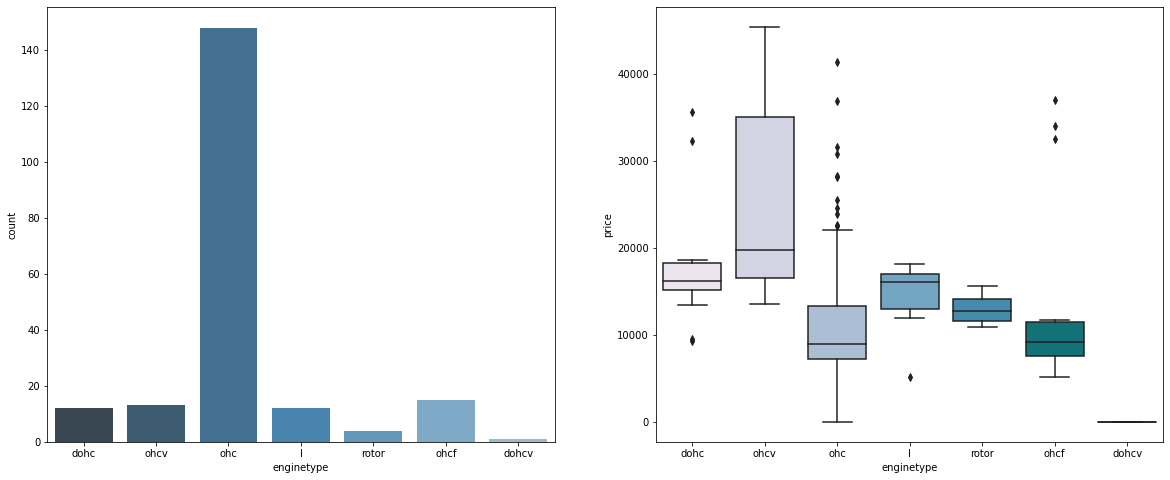

In [19]:
plt.figure(figsize = (20,8))

plt.subplot(1,2,1)

sns.countplot(df.enginetype, palette = ('Blues_d'))

plt.subplot(1,2,2)

sns.boxplot(x=df.enginetype, y = df.price, palette =('PuBuGn'))

plt.show()

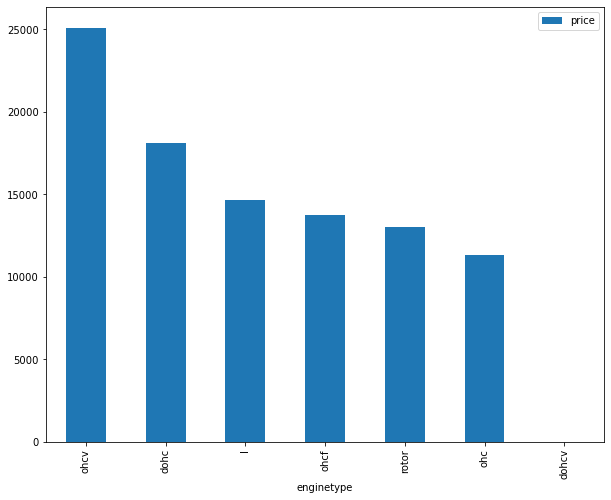

In [20]:
df1 = pd.DataFrame(df.groupby(['enginetype'])['price'].mean().sort_values(ascending = False))
df1.plot.bar(figsize = (10,8))

plt.show()

<Figure size 2160x720 with 0 Axes>

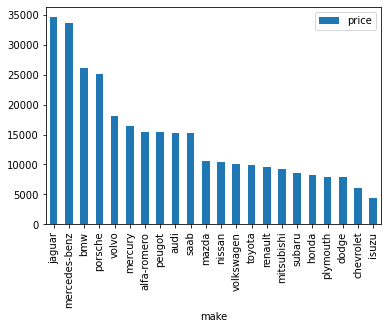

In [21]:
plt.figure(figsize=(30,10))

df1 = pd.DataFrame(df.groupby(['make'])['price'].mean().sort_values(ascending = False))
df1.plot.bar()
plt.show()

<Figure size 2160x720 with 0 Axes>

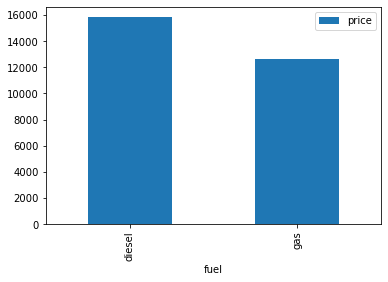

In [22]:
plt.figure(figsize=(30,10))

df1 = pd.DataFrame(df.groupby(['fuel'])['price'].mean().sort_values(ascending = False))
df1.plot.bar()
plt.show()

<Figure size 2160x720 with 0 Axes>

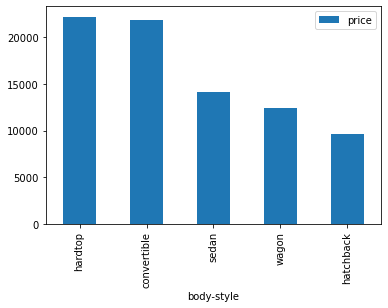

In [23]:
plt.figure(figsize = (30,10))
df1 = pd.DataFrame(df.groupby(['body-style'])['price'].mean().sort_values(ascending = False))
df1.plot.bar()
plt.show()

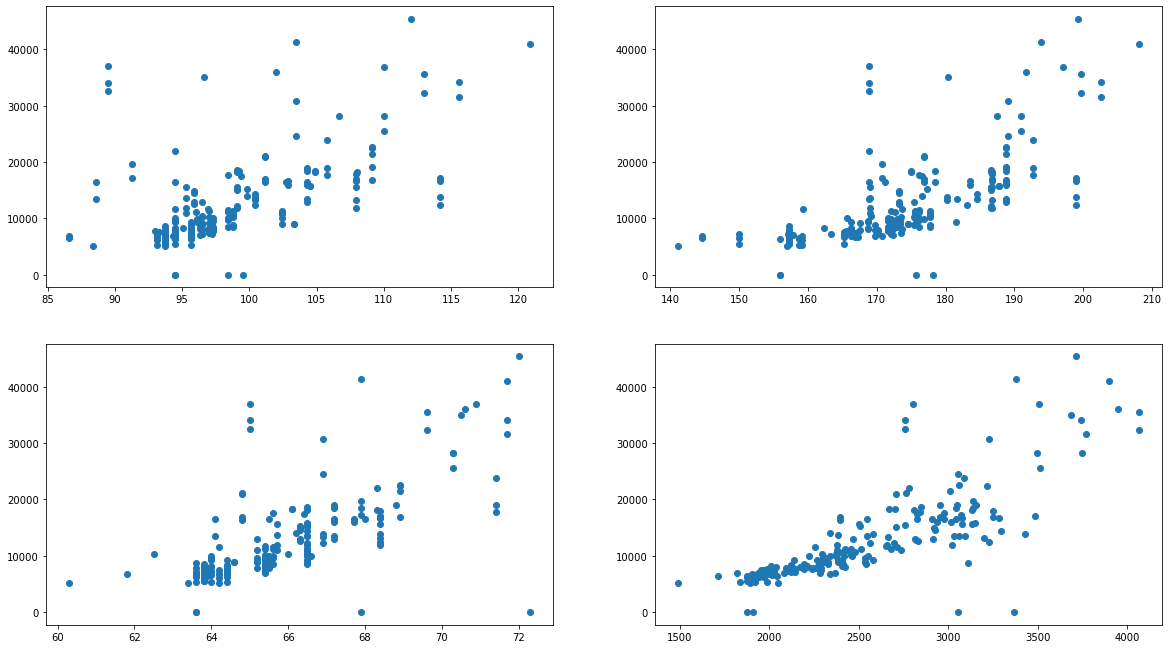

In [24]:
def sctr(x,fig):
    plt.subplot(5,2,fig)
    plt.scatter(df[x],df['price'])
    
plt.figure(figsize=(20,30))

sctr('wheel-base',1)
sctr('length',2)
sctr('width',3)
sctr('curb-weight',4)

In [25]:
df['milage'] = (0.55 * df['city-mpg'])+ (0.45 * df['highway-mpg'])

In [26]:
df['price'] = df['price'].astype('int')

In [27]:
temp = df.copy()
table = temp.groupby(['make'])['price'].mean()

temp = temp.merge(table.reset_index(), how = 'left', on = 'make')

bins = [0,10000,20000,40000]
car_bin = ['low', 'mid', 'high']

df['carrange'] = pd.cut(temp['price_y'], bins, right= False, labels=car_bin)

df.head()

,symboling,normalized-losses,make,fuel,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,milage,carrange
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,3.47,2.68,9.0,111,5000,21,27,13495,23.70,mid
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,3.47,2.68,9.0,111,5000,21,27,16500,23.70,mid
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,2.68,3.47,9.0,154,5000,19,26,16500,22.15,mid
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,3.19,3.40,10.0,102,5500,24,30,13950,26.70,mid
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,3.19,3.40,8.0,115,5500,18,22,17450,19.80,mid


<Figure size 2160x720 with 0 Axes>

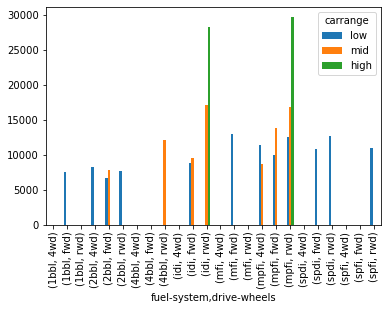

In [28]:
plt.figure(figsize = (30,10))

df1 = pd.DataFrame(df.groupby(['fuel-system', 'drive-wheels', 'carrange'])['price'].mean().unstack(fill_value = 0))
df1.plot.bar()
plt.show()

In [29]:
cars = df[['price', 'fuel', 'aspiration', 'body-style','drive-wheels','wheel-base','curb-weight','enginetype','num-of-cylinders', 'engine-size', 'bore', 'horsepower','milage','length', 'width', 'carrange']]

In [30]:
cars.head()

,price,fuel,aspiration,body-style,drive-wheels,wheel-base,curb-weight,enginetype,num-of-cylinders,engine-size,bore,horsepower,milage,length,width,carrange
0,13495,gas,std,convertible,rwd,88.6,2548,dohc,four,130,3.47,111,23.70,168.8,64.1,mid
1,16500,gas,std,convertible,rwd,88.6,2548,dohc,four,130,3.47,111,23.70,168.8,64.1,mid
2,16500,gas,std,hatchback,rwd,94.5,2823,ohcv,six,152,2.68,154,22.15,171.2,65.5,mid
3,13950,gas,std,sedan,fwd,99.8,2337,ohc,four,109,3.19,102,26.70,176.6,66.2,mid
4,17450,gas,std,sedan,4wd,99.4,2824,ohc,five,136,3.19,115,19.80,176.6,66.4,mid


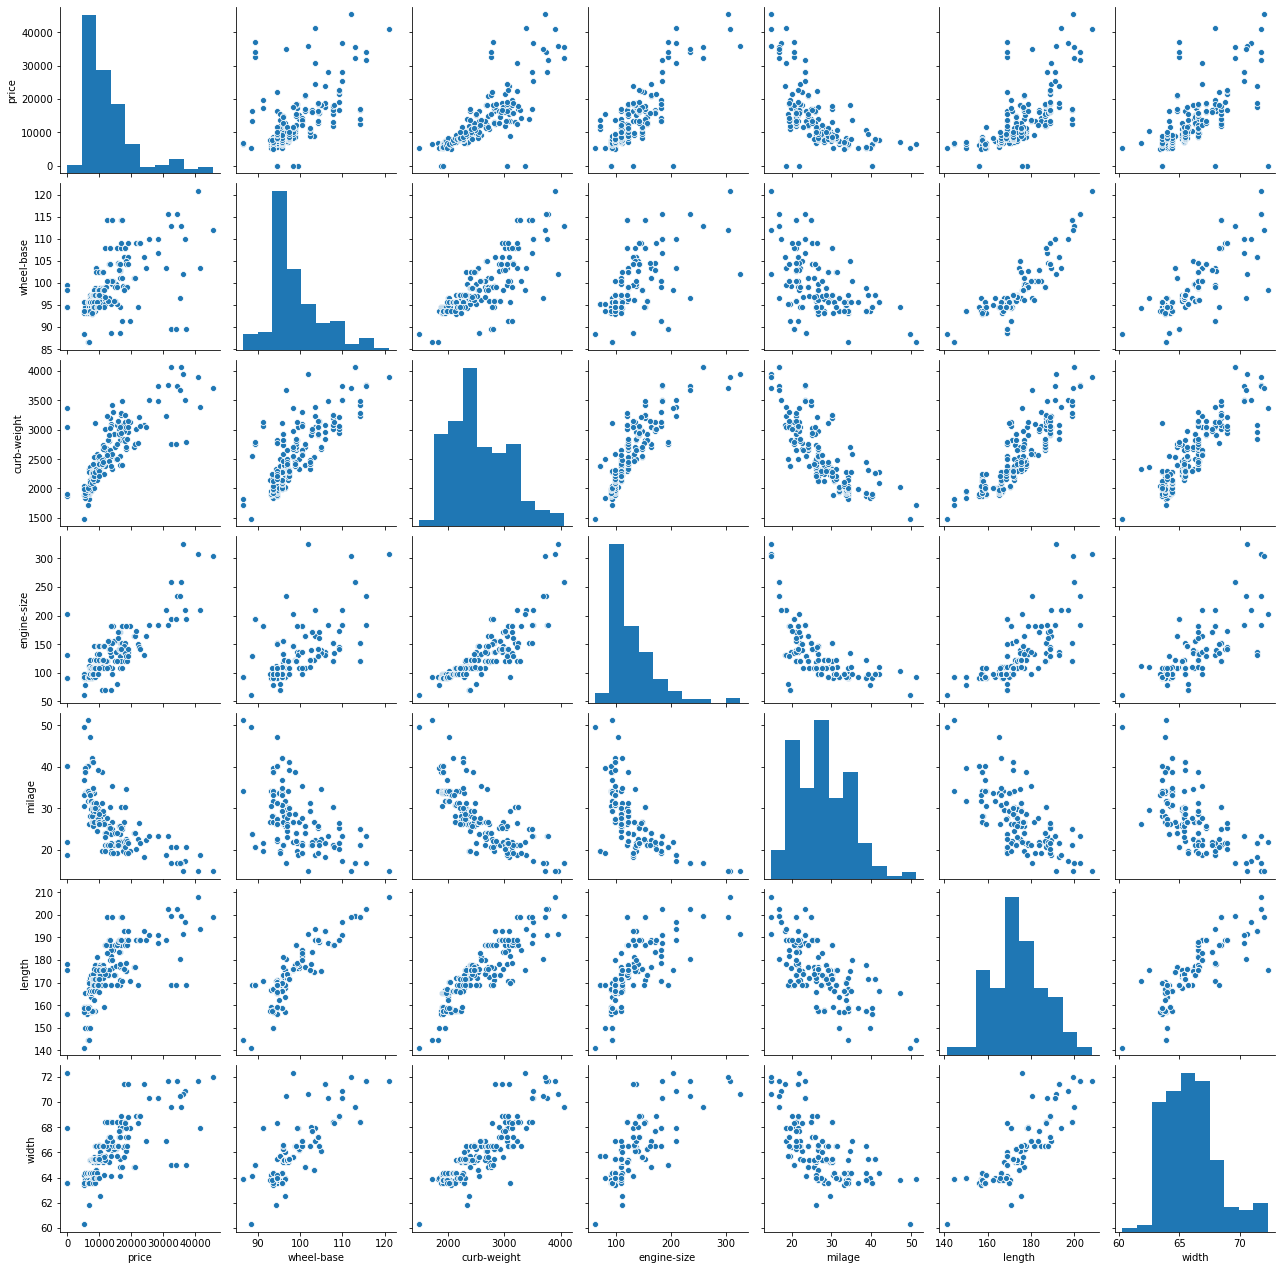

In [31]:
sns.pairplot(cars)
plt.show()

In [32]:
def dummies(x,df):
    temp = pd.get_dummies(df[x], drop_first = True)
    df = pd.concat([df,temp], axis = 1)
    df.drop([x], axis = 1, inplace = True)
    
    return df

In [33]:
cars = dummies('fuel',cars)
cars = dummies('aspiration',cars)
cars = dummies('body-style',cars)
cars = dummies('drive-wheels',cars)
cars = dummies('enginetype',cars)
cars = dummies('num-of-cylinders',cars)
cars = dummies('carrange',cars)

In [34]:
cars.head()
cars.tail()

,price,wheel-base,curb-weight,engine-size,bore,horsepower,milage,length,width,gas,...,ohcv,rotor,five,four,six,three,twelve,two,mid,high
200,16845,109.1,2952,141,3.78,114,25.25,188.8,68.9,1,...,0,0,0,1,0,0,0,0,1,0
201,19045,109.1,3049,141,3.78,160,21.70,188.8,68.8,1,...,0,0,0,1,0,0,0,0,1,0
202,21485,109.1,3012,173,3.58,134,20.25,188.8,68.9,1,...,1,0,0,0,1,0,0,0,1,0
203,22470,109.1,3217,145,3.01,106,26.45,188.8,68.9,0,...,0,0,0,0,1,0,0,0,1,0
204,22625,109.1,3062,141,3.78,114,21.70,188.8,68.9,1,...,0,0,0,1,0,0,0,0,1,0


In [35]:
cars.shape

(205, 31)

In [36]:
cars.describe()

,price,wheel-base,curb-weight,engine-size,milage,length,width,gas,turbo,hardtop,...,ohcv,rotor,five,four,six,three,twelve,two,mid,high
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,...,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,12949.429268,98.756585,2555.565854,126.907317,27.708780,174.049268,65.907805,0.902439,0.180488,0.039024,...,0.063415,0.019512,0.053659,0.775610,0.117073,0.004878,0.004878,0.019512,0.419512,0.117073
std,8079.043284,6.021776,520.680204,41.642693,6.649183,12.337289,2.145204,0.297446,0.385535,0.194127,...,0.244304,0.138655,0.225894,0.418201,0.322294,0.069843,0.069843,0.138655,0.494687,0.322294
min,0.000000,86.600000,1488.000000,61.000000,14.800000,141.100000,60.300000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7689.000000,94.500000,2145.000000,97.000000,21.950000,166.300000,64.100000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,10198.000000,97.000000,2414.000000,120.000000,26.700000,173.200000,65.500000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,16500.000000,102.400000,2935.000000,141.000000,31.800000,183.100000,66.900000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,45400.000000,120.900000,4066.000000,326.000000,51.250000,208.100000,72.300000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [39]:
for i in range(len(cars['bore'])):
    if cars['bore'][i] == '?':
        cars['bore'][i] = 3.00
     

In [41]:
for i in range(len(cars['horsepower'])):
    if cars['horsepower'][i] == '?' and cars['horsepower'][i+1] != '?':
        cars['horsepower'][i] = 100

In [75]:
from sklearn.model_selection import train_test_split

np.random.seed(1)

car_train, car_test = train_test_split(cars, train_size = 0.7, test_size = 0.3, random_state = 1)

In [77]:
from sklearn.preprocessing import MinMaxScaler

scale = MinMaxScaler()

var = ['wheel-base','curb-weight', 'engine-size', 'bore', 'horsepower','milage','length', 'width', 'price']

car_train[var] = scale.fit_transform(car_train[var])



<ipython-input-77-180d3d7bd746>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  car_train[var] = scale.fit_transform(car_train[var])
C:\Users\Rahul K\anaconda3\lib\site-packages\pandas\core\indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [78]:
car_train.head()

,price,wheel-base,curb-weight,engine-size,bore,horsepower,milage,length,width,gas,...,ohcv,rotor,five,four,six,three,twelve,two,mid,high
124,0.281145,0.320690,0.469613,0.335938,0.750000,0.383621,0.176955,0.493103,0.428571,1,...,0,0,0,1,0,0,0,0,0,0
181,0.346916,0.617241,0.611135,0.355469,0.521429,0.431034,0.176955,0.744828,0.447619,1,...,0,0,0,0,1,0,0,0,0,0
154,0.173965,0.313793,0.245219,0.085938,0.364286,0.025862,0.396433,0.432759,0.171429,1,...,0,0,0,1,0,0,0,0,0,0
53,0.147467,0.224138,0.098598,0.082031,0.350000,0.051724,0.530864,0.382759,0.228571,1,...,0,0,0,1,0,0,0,0,1,0
94,0.160771,0.272414,0.101147,0.105469,0.435714,0.056034,0.518519,0.356897,0.190476,1,...,0,0,0,1,0,0,0,0,1,0


In [79]:
 car_train.describe()

,price,wheel-base,curb-weight,engine-size,bore,horsepower,milage,length,width,gas,...,ohcv,rotor,five,four,six,three,twelve,two,mid,high
count,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,...,143.000000,143.000000,143.000000,143.000000,143.000000,143.0,143.000000,143.000000,143.000000,143.000000
mean,0.289755,0.418881,0.367580,0.228502,0.566434,0.219707,0.342772,0.519279,0.402997,0.909091,...,0.069930,0.013986,0.055944,0.762238,0.132867,0.0,0.006993,0.013986,0.440559,0.118881
std,0.179288,0.205394,0.216308,0.161243,0.196466,0.180137,0.177908,0.202338,0.205816,0.288490,...,0.255926,0.117845,0.230621,0.427209,0.340624,0.0,0.083624,0.117845,0.498199,0.324786
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
25%,0.167599,0.272414,0.216532,0.109375,0.435714,0.060345,0.190672,0.393103,0.228571,1.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
50%,0.235639,0.358621,0.317467,0.195312,0.550000,0.176724,0.326475,0.493103,0.352381,1.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
75%,0.363436,0.537931,0.522949,0.285156,0.742857,0.278017,0.460219,0.670690,0.485714,1.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.0,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000


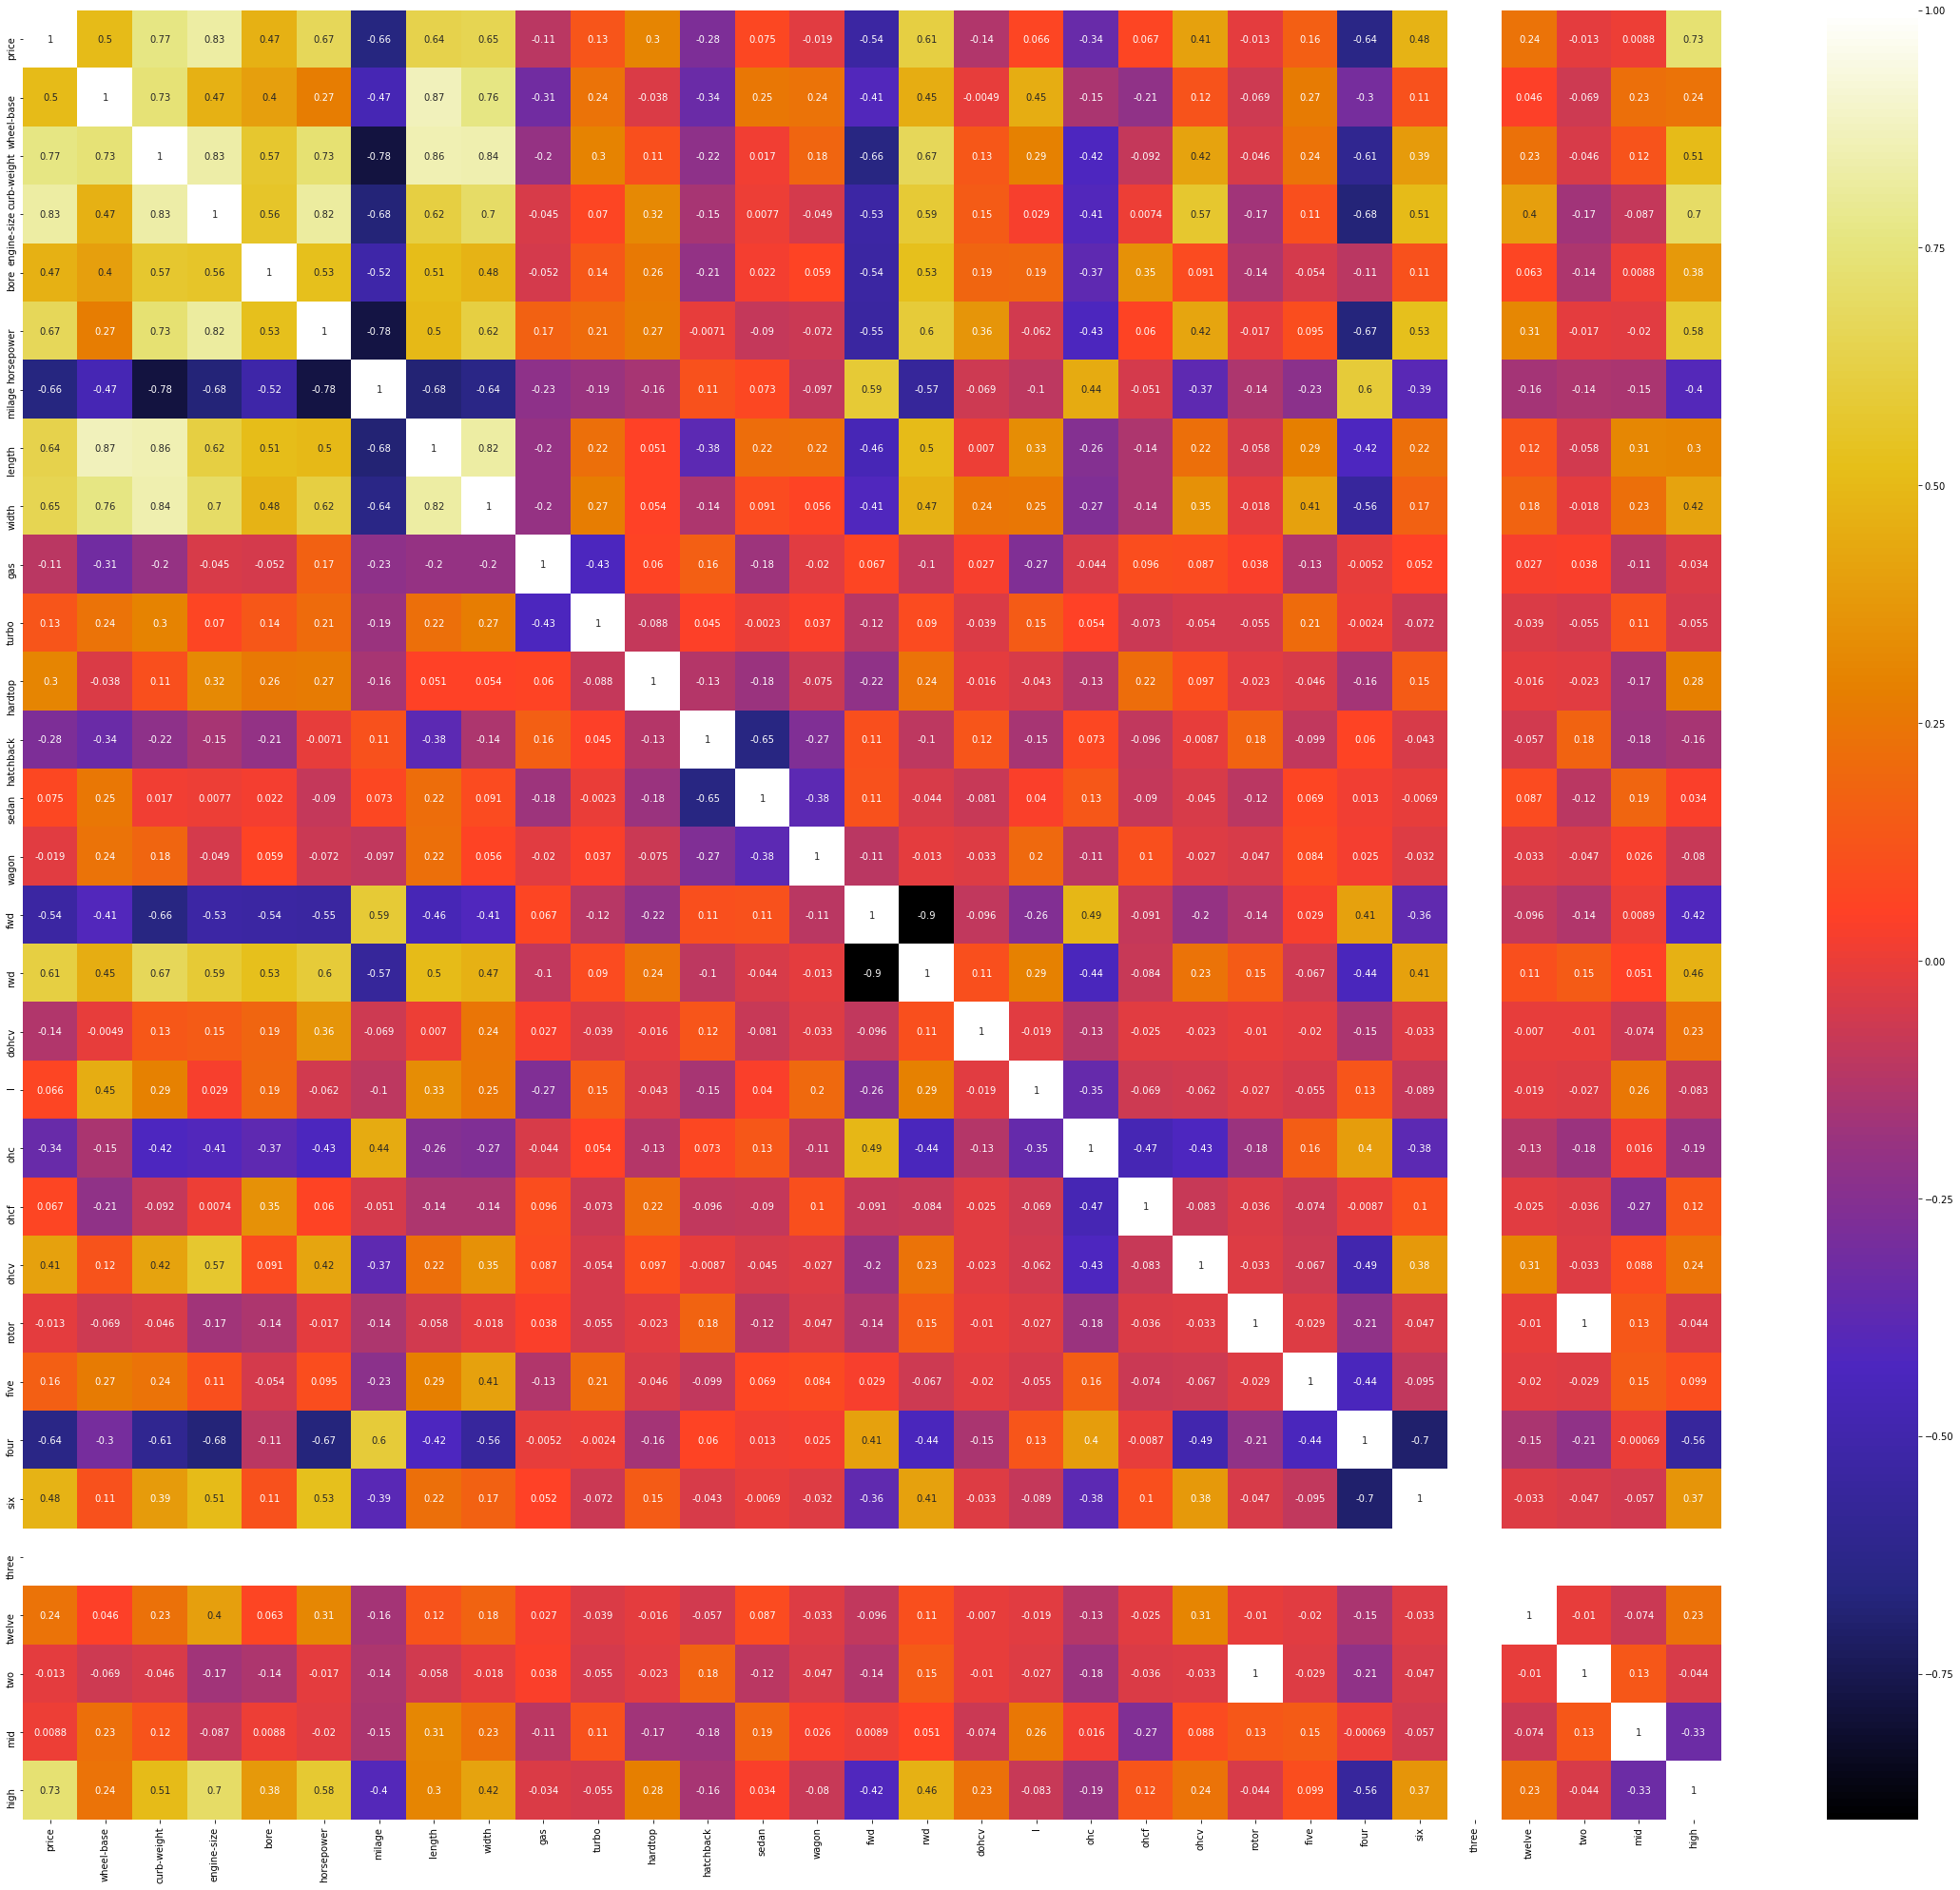

In [80]:
plt.figure(figsize = (40,35))
sns.heatmap(car_train.corr(), annot = True, cmap='CMRmap')
plt.show()

In [81]:
y_train = car_train.pop('price')
X_train = car_train


In [82]:
y_test = car_test.pop('price')
X_test = car_test

In [83]:
print("x train", X_train.shape)
print("y train", y_train.shape)
print("x test", X_test.shape)
print("y test", y_test.shape)

x train (143, 30)
y train (143,)
x test (62, 30)
y test (62,)


In [84]:
from sklearn.metrics import r2_score, accuracy_score

from sklearn.model_selection import cross_val_score

from sklearn.feature_selection import RFE

In [85]:
cv = 5
r_2 = []
CV = []

def model(algo, X, y, Xt, yt):
    algo.fit(X,y)
    pred = algo.predict(Xt)
    prediction = pd.DataFrame(pred)
    R_2 = r2_score(yt, prediction)
    cross_val = cross_val_score(algo, X,y, cv=cv)
    
    print(algo)
    print(f'r2 score : {R_2}')
    print(f'cv score mean: {cross_val.mean()}')
    
    return prediction
    

In [86]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train, y_train)
rfe = RFE(lr, n_features_to_select=10)
rfe = rfe.fit(X_train, y_train) 


In [89]:
col = X_train.columns[rfe.support_]
X_train_rfe = X_train[col]

In [90]:
import statsmodels.api as sm
X_train_rfe = sm.add_constant(X_train_rfe)

In [91]:
lm = sm.OLS(y_train, X_train_rfe).fit()

In [92]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.896
Model:                            OLS   Adj. R-squared:                  0.889
Method:                 Least Squares   F-statistic:                     114.3
Date:                Tue, 13 Oct 2020   Prob (F-statistic):           5.88e-60
Time:                        16:12:28   Log-Likelihood:                 205.53
No. Observations:                 143   AIC:                            -389.1
Df Residuals:                     132   BIC:                            -356.5
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.0318      0.031      1.018      

In [97]:
from sklearn.tree import DecisionTreeRegressor

dtr = DecisionTreeRegressor()

dtr.fit(X_train, y_train)
pred = dtr.predict(X_test)

In [100]:
dtr.fit(X_train, y_train)
rfe = RFE(lr, n_features_to_select=10)
rfe = rfe.fit(X_train, y_train) 

In [101]:
col = X_train.columns[rfe.support_]
X_train_rfe = X_train[col]

In [102]:
import statsmodels.api as sm
X_train_rfe = sm.add_constant(X_train_rfe)

In [103]:
lm = sm.OLS(y_train, X_train_rfe).fit()

In [104]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.896
Model:                            OLS   Adj. R-squared:                  0.889
Method:                 Least Squares   F-statistic:                     114.3
Date:                Tue, 13 Oct 2020   Prob (F-statistic):           5.88e-60
Time:                        16:18:17   Log-Likelihood:                 205.53
No. Observations:                 143   AIC:                            -389.1
Df Residuals:                     132   BIC:                            -356.5
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.0318      0.031      1.018      